In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab , deltaE_cie76 
import os
import cv2
%matplotlib inline

shape:(238, 320, 3)


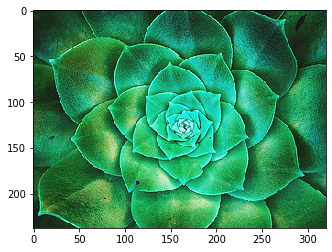

In [2]:
image = cv2.imread(r"C:\Users\Umesh\Documents\JupyterNotebook\Images\Green2.jpg")
print("shape:{}".format(image.shape))
plt.imshow(image);

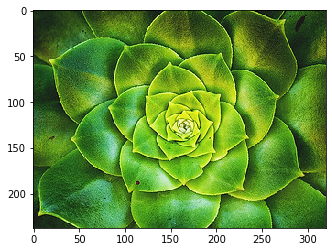

In [3]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image);

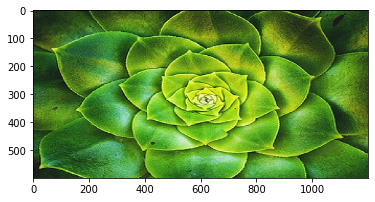

In [4]:
resized_image = cv2.resize(image, (1200,600))
plt.imshow(resized_image);

In [5]:
def HEX2RGB(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [HEX2RGB(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([34.62909345, 65.88091957, 23.44529171]),
 array([154.99973094, 201.76292975,  36.48502242]),
 array([106.44744201, 187.46021824,  89.66419916]),
 array([194.47867197, 230.79746427, 106.47340711]),
 array([ 93.5108424 , 158.37434435,  34.13051361]),
 array([ 60.15302481, 112.80524772,  29.913612  ])]

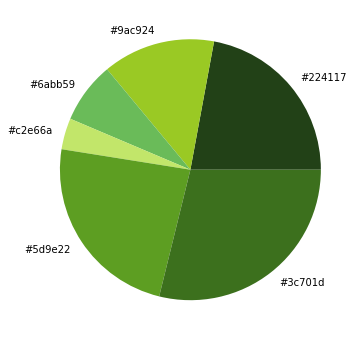

In [8]:
get_colors(get_image(r"C:\Users\Umesh\Documents\JupyterNotebook\Images\Green2.jpg"),6,True)

In [9]:
Image_Dir = 'images'
COLORS = {'RED' :[128,0,0],
          'GREEN': [0,128,0],
          'BLUE': [0,0,128]}

images = []
for file in os.listdir(Image_Dir):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(Image_Dir,file)))

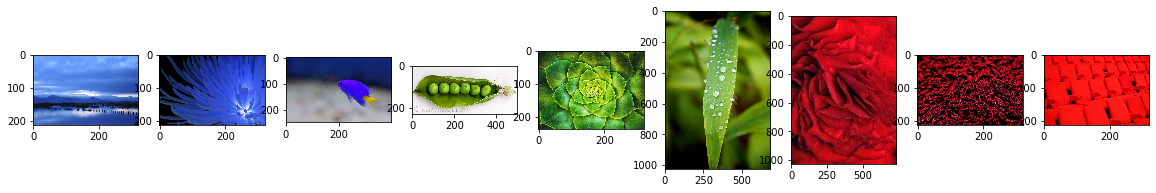

In [10]:
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i])

In [11]:
def match_image_by_color(image,color,threshold = 60, number_of_colors = 3):
    image_colors = get_colors(image,number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    return select_image

In [12]:
def show_selected_images(images,color,threshold,colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                       color,
                                       threshold,
                                       colors_to_match)
        
        if (selected):
            plt.subplot(1,9,index)
            plt.imshow(images[i])
            index += 1

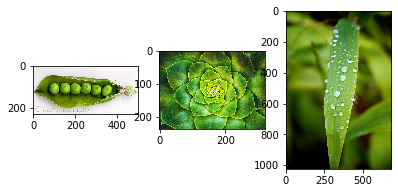

In [13]:
# Green Color
plt.figure(figsize = (20,10))
show_selected_images(images,COLORS['GREEN'],60,3)

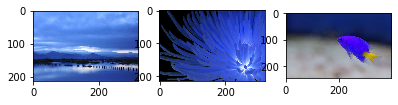

In [14]:
# Blue color
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['BLUE'],60,3)

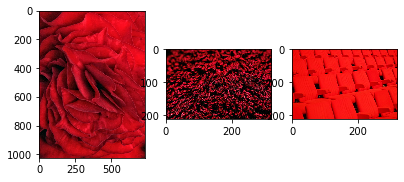

In [15]:
# Red color
plt.figure(figsize=(20,10))
show_selected_images(images,COLORS['RED'],60,3)